In [1]:
import sys
sys.path.append(r"C:\Users\User\Documents\GitHub\prodpy")

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
from IPRcurve import IPR

In [5]:
poro = 0.19
perm = 8.2      # mD
height = 53     # ft
Bo = 1.1
muo = 1.7       # cp
ct = 1.29e-5    # 1/psi
darea = 640     # acres
rw = 0.328      # ft
skin = 0

In [6]:
re = np.sqrt((43560*darea)/np.pi)

In [7]:
inflow = IPR(
    poro = poro,
    perm = perm,
    height = height,
    Bo = Bo,
    muo = muo,
    ct = ct,
    re = re,
    rw = rw,
    skin = skin
    )

In [8]:
pres = 5651     # psi

In [9]:
prange = np.linspace(0,pres)

# Undersaturated Reservoirs

In [10]:
inflow.PI(regime="transient",time=30)

0.2074594206733534

In [11]:
inflow.PI(regime="steady")

0.1805932965750903

In [13]:
inflow.undersaturated(pres,pwf=np.array([50,5651]),regime="steady")

array([1011.50305412,    0.        ])

In [14]:
inflow.PI(regime="pseudo")

0.19678698757306326

In [16]:
inflow.undersaturated(pres,pwf=np.array([50,5651]),regime="pseudo")

array([1102.2039174,    0.       ])

In [17]:
q_transt = inflow.undersaturated(pres,pwf=prange,regime="transient",time=30)
q_steady = inflow.undersaturated(pres,pwf=prange,regime="steady")
q_pseudo = inflow.undersaturated(pres,pwf=prange,regime="pseudo")

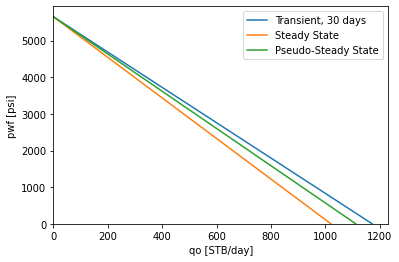

In [18]:
plt.plot(q_transt,prange,label='Transient, 30 days')
plt.plot(q_steady,prange,label='Steady State')
plt.plot(q_pseudo,prange,label='Pseudo-Steady State')

plt.xlabel("qo [STB/day]")
plt.ylabel("pwf [psi]")

plt.legend()

plt.xlim(xmin=0)
plt.ylim(ymin=0)

plt.show()

# Two-Phase Reservoirs

In [23]:
prange2 = np.array([5651,5000,4500,4000,3500,3000,2500,2000,1500,1000,500,0])

In [26]:
inflow.saturated(pres,pwf=prange2,model="vogel")

array([  0.        , 121.54913411, 205.99779407, 282.70792251,
       351.67951942, 412.91258479, 466.40711863, 512.16312094,
       550.18059172, 580.45953097, 602.99993869, 617.80181488])

In [27]:
inflow.saturated(pres,pwf=prange2,model="fetkovich",n=2)

array([  0.        ,  29.12666073,  82.70204591, 153.81076364,
       234.72853166, 318.6398068 , 399.63778498, 472.7244012 ,
       533.81032958, 579.71498328, 608.16651459, 617.80181488])

In [28]:
q_vogel = inflow.saturated(pres,pwf=prange,model="vogel")
q_fetkovich = inflow.saturated(pres,pwf=prange,model="fetkovich",n=2)

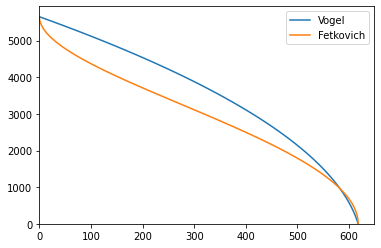

In [29]:
plt.plot(q_vogel,prange,label='Vogel')
plt.plot(q_fetkovich,prange,label='Fetkovich')

plt.legend()

plt.xlim(xmin=0)
plt.ylim(ymin=0)

plt.show()

# Partial Two-Phase Reservoirs

In [37]:
prange3 = np.array([0,565,1130,1695,2260,2826,3000,5651])

In [38]:
inflow.partial(3000,pres,pwf=prange3,model="vogel")

array([849.66061668, 828.00020007, 787.7266498 , 728.83996587,
       651.34014828, 555.04058466, 521.68230406,   0.        ])

In [31]:
q_vogel = inflow.partial(3000,pres,pwf=prange,model="vogel")

In [34]:
q_fetkovich = inflow.partial(3000,pres,pwf=prange,model="fetkovich",n=1.1,regime="pseudo")

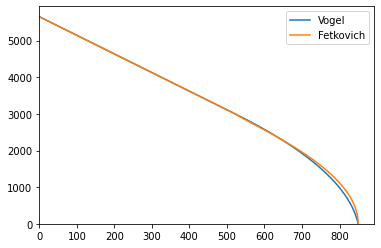

In [35]:
plt.plot(q_vogel,prange,label='Vogel')
plt.plot(q_fetkovich,prange,label='Fetkovich')

plt.legend()

plt.xlim(xmin=0)
plt.ylim(ymin=0)

plt.show()

# IPR Curves Using Test Points

# Composite IPR Model